In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Scikit-Learn
**Facundo A. Lucianna - Inteligencia Artificial - CEIA - FIUBA**

Aprovechemos que estamos introduciéndonos en el Aprendizaje Automático para presentar una de las librerías más conocidas en este ámbito, llamada [Scikit-Learn](https://scikit-learn.org/stable/). Esta librería ofrece herramientas simples y eficientes para el análisis de datos y la construcción de modelos de Machine Learning, tanto para principiantes como para expertos, facilitando tareas como clasificación, regresión y clustering. Nos proporciona una amplia gama de funciones que simplifican el desarrollo de todas las etapas del ciclo de vida de Machine Learning.

## Ciclo de vida de Machine Learning

El ciclo de vida que vimos en clase tiene la siguiente estructura:

![proceso ML](./img/proceso_ml.png)

Este ciclo se divide en los siguientes pasos:

- **Preprocesamiento**: Se refiere a la preparación de los datos antes de entrenar el modelo. Esto incluye la limpieza de datos, el manejo de valores nulos, normalización, transformación y la codificación de variables categóricas.
- **Entrenamiento**: En esta etapa, el modelo aprende patrones a partir de los datos de entrenamiento utilizando algoritmos de Machine Learning. Se ajustan los parámetros del modelo para que pueda realizar predicciones precisas.
- **Evaluación**: Después de entrenar el modelo, se evalúa su rendimiento utilizando un conjunto de datos de prueba. Se miden diferentes métricas para determinar la efectividad del modelo.
- **Predicción**: Finalmente, una vez que el modelo ha sido entrenado y evaluado, se utiliza para hacer predicciones sobre nuevos datos. Esta es la etapa en la que el modelo se aplica en situaciones del mundo real.

Scikit-learn está diseñado para ayudarnos en cada uno de estos pasos. Veamos en esta notebook algunas de las herramientas que nos ofrece. Aquí solo haremos una introducción superficial, ya que aún no hemos aprendido sobre modelos, pero en los siguientes módulos profundizaremos en estos aspectos.

**Nota**: No olvides agregar la librería scikit-learn a tu entorno virtual. Si usas conda, debes ejecutar:


```bash
conda install -y scikit-learn
```

----

### Preprocesamiento

En general, un problema de aprendizaje consiste en tomar un conjunto de N **muestras de datos** y luego tratar de predecir propiedades de **datos desconocidos**. Si cada muestra no es solo un número, sino que, por ejemplo, es una entrada multidimensional, se dice que tiene varios **atributos o características**.

Una parte fundamental del rol del Data Scientist es lograr formar este dataset de manera adecuada. Veamos qué herramientas nos ofrece Scikit-Learn para tareas de preprocesamiento, pero antes necesitamos una fuente de datos. Para ello, podemos usar los datasets de ejemplo que nos proporciona Scikit-Learn:

En este caso, vamos a trabajar con el famoso [dataset Iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset), que contiene datos sobre tres especies de flores (Setosa, Versicolor y Virginica), con cuatro características de cada flor: **largo y ancho del sépalo**, **largo y ancho del pétalo**. Este conjunto de datos es muy utilizado para practicar técnicas de clasificación y preprocesamiento.

In [2]:
from sklearn import datasets 
iris = datasets.load_iris()

Veamos una parte del dataset:

In [3]:
iris.data[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Como podemos ver, es un array de Numpy. Qué representa cada columna lo podemos ver en:

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

También tenemos los **labels** para las mismas observaciones:

In [5]:
# Label de las primeras 5 observaciones, que son todas setosas
iris.target[:5]

array([0, 0, 0, 0, 0])

Estos son una codificación numérica de las categorías verdaderas:

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

El orden de los números corresponde a cómo se guardan los labels:

In [7]:
label_dict = {
    0: "setosa",
    1: "versicolor",
    2: "virginica"
}

Podemos guardar estos datos en un **DataFrame** de Pandas:

In [8]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Guardamos el label
df_iris["label"] = iris.target
df_iris["label"] = df_iris["label"].apply(lambda x: label_dict[x])

In [9]:
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    label  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

Grafiquemos los datos para poder visualizarlos. Para ello, elegimos dos columnas:

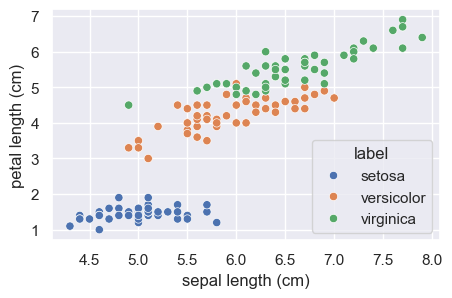

In [10]:
plt.figure(figsize=(5, 3))
# Usemos a seaborn
sns.scatterplot(data=df_iris, x="sepal length (cm)", y="petal length (cm)", hue="label")

plt.show()

Con este dataset, guardemos los datos en variables para su posterior uso. Siguiendo la nomenclatura de Scikit-Learn, para los atributos usamos `X` y para el label usamos `y`.

In [11]:
# Guardamos los arrays de Numpy
X = iris.data
y = iris.target

También podemos guardar los datos en un **DataFrame** y **Series** de Pandas para mostrar que Scikit-Learn acepta ambos casos, aunque en general los outputs de sus funciones son arrays de Numpy:

In [12]:
X_df = df_iris.drop(columns="label")
y_df = df_iris["label"]

Con estos datos separados, ya podemos aplicar algún preprocesamiento. Scikit-Learn nos ofrece una gran [variedad de herramientas(https://scikit-learn.org/stable/modules/preprocessing.html).

Veamos, por ejemplo, un proceso de estandarización de atributos. No te preocupes si aún no entendemos todos los detalles; en los siguientes módulos profundizaremos más en estos conceptos. Por ahora, solo pensemos que esta herramienta nos permite escalar todos los atributos en una escala similar, sin perder la información más importante, que es cómo varían:

In [13]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler

StandardScaler()

Scikit-Learn en notebook nos muestra un pequeño recuadro con información sobre la herramienta que estemos utilizando. En este caso, está en color naranja porque aún no está configurada.

Para poder configurar este preprocesador, debemos pasarle algunos datos para que calcule sus parámetros. Esto nos introduce a uno de los métodos más famosos de Scikit-Learn, llamado `.fit()`, que usamos para configurar preprocesadores. Cuando entrenemos modelos, este método indicará que comience el proceso de entrenamiento.

Configuremos nuestro preprocesador:

In [14]:
scaler.fit(X)

StandardScaler()

Ahora veremos que Scikit-Learn muestra el recuadro en azul, indicando que el preprocesador está configurado. Ahora, usando el método `.transform()`, podemos transformar nuestros datos:

In [15]:
scaler.transform(X)[:5, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

**Nota**: No te preocupes por estos números y por qué cambiaron de esa forma. En el siguiente módulo volveremos a este tema con más detalle para entenderlo mejor.

Observa que este preprocesador también acepta DataFrames de Pandas, aunque muestra un *warning* porque, cuando se configuró, las columnas de atributos no tenían nombre (por ser un array de Numpy), pero ahora los datos tienen nombres (por ser un DataFrame):

In [16]:
scaler.transform(X_df)[:5, :]

/Users/facundolucianna/anaconda3/envs/ia_env2/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Si no queremos tener este problema, podemos crear un escalador para el DataFrame, el cual podemos configurar y hacer transformaciones en un solo paso usando `fit_transform()`, que es un atajo para hacer primero `fit()` y luego `transform()`:

In [17]:
scaler_df = preprocessing.StandardScaler()
X_scaled_df = scaler_df.fit_transform(X_df)

X_scaled_df[:5, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Grafiquemos los datos después de haber pasado por el preprocesador:

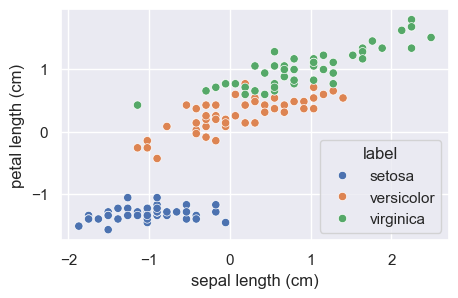

In [18]:
df_temp = df_iris.copy()
df_temp[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']] = X_scaled_df

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_temp, x="sepal length (cm)", y="petal length (cm)", hue="label")

plt.show()

Observa la escala de los atributos; son distintas a las que teníamos originalmente, pero la distribución de los puntos se mantiene.

Scikit-learn también nos ofrece preprocesadores para variables categóricas. En este caso, podemos aplicarlo a modo de ejemplo a nuestro **label**. Vamos a aplicar una técnica que transforma una variable categórica en un conjunto de variables numéricas:

In [19]:
ordinal_encoder = preprocessing.OneHotEncoder()
ordinal_encoder.fit_transform(y_df.array.reshape(-1, 1)).toarray()[:5, :]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

Nota: Insisto en que por ahora no es nuestro objetivo entender exactamente qué hace, sino ver ejemplos de lo que Scikit-learn ofrece. Si te pica el bicho de la curiosidad, podés leer la documentación de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).

También tenemos otros preprocesadores muy útiles, como uno que puede hacer [imputaciones](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) cuando faltan valores, aunque en este caso no lo necesitamos.

### Separación del dataset

En esta etapa, además de preparar el dataset, debemos separarlo en los conjuntos de entrenamiento y evaluación. Scikit-learn también nos ayuda con esto mediante la función [`train_test_split`](https://scikit-learn.org/1.4/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split). 

Por ejemplo, separemos el dataset en un 30% para evaluación:

In [20]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

print("Valores de X_train:",X_train.shape[0])
print("Valores de y_train:",y_train.shape[0])
print("Valores de X_test:",X_test.shape[0])
print("Valores de y_test:",y_test.shape[0])

Valores de X_train: 105
Valores de y_train: 105
Valores de X_test: 45
Valores de y_test: 45


Los conjuntos de entrenamiento y evaluación se separaron al azar entre observaciones. Si vemos los primeros valores del conjunto de entrenamiento:

In [21]:
X_train[:5, :]

array([[6.7, 3.3, 5.7, 2.1],
       [4.9, 3. , 1.4, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.7, 3. , 5. , 1.7]])

Si hacemos una nueva separación, estos datos serán diferentes:

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

X_train[:5, :]


array([[5.1, 3.5, 1.4, 0.3],
       [6.3, 3.4, 5.6, 2.4],
       [5.8, 2.7, 5.1, 1.9],
       [4.9, 3.6, 1.4, 0.1],
       [5.5, 2.4, 3.7, 1. ]])

Muchas veces, aunque se separen al azar, queremos que la separación sea reproducible, es decir, que cada vez que ejecutemos esa función, se realice de la misma manera. Para ello, podemos usar el argumento `random_state`, que nos permite hacer esto. Al darle un valor específico, cada vez que ejecutemos `train_test_split`, obtendremos la misma distribución en los conjuntos de entrenamiento y evaluación:

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

X_train[:5, :]

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5]])

In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

X_train[:5, :]

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5]])

Cuando estamos ante un problema de clasificación, muchas veces nos importa que la proporción de clases se mantenga igual tanto en el conjunto de entrenamiento como en el de evaluación, especialmente en casos donde haya una clase con pocas observaciones. Esto es para lograr generalizar y reducir el riesgo empírico. Scikit-learn nos ofrece el argumento `stratify`. Veamos dos casos: 

Uno sin usar stratify:

In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size=0.3, random_state=42)

In [26]:
print("Proporción de clases de dataset:")
print(y_df.value_counts())

print("\nProporción de clases del conjunto de entrenamiento:")
print(y_train.value_counts())

print("\nProporción de clases del conjunto de evaluación:")
print(y_test.value_counts())

Proporción de clases de dataset:
label
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Proporción de clases del conjunto de entrenamiento:
label
versicolor    37
virginica     37
setosa        31
Name: count, dtype: int64

Proporción de clases del conjunto de evaluación:
label
setosa        19
versicolor    13
virginica     13
Name: count, dtype: int64


Observa que, si no usamos `stratify`, por azar, el conjunto de entrenamiento tuvo menos observaciones de `setosa`, mientras que el conjunto de evaluación tuvo más de `setosa`, a pesar de que el dataset original tenía una distribución uniforme de clases.

Veamos ahora usando `stratify`, pasando los labels del dataset al argumento:

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size=0.3, stratify=y_df, 
                                                                    random_state=42)

print("Proporción de clases de dataset:")
print(y_df.value_counts())

print("\nProporción de clases del conjunto de entrenamiento:")
print(y_train.value_counts())

print("\nProporción de clases del conjunto de evaluación:")
print(y_test.value_counts())

Proporción de clases de dataset:
label
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Proporción de clases del conjunto de entrenamiento:
label
versicolor    35
setosa        35
virginica     35
Name: count, dtype: int64

Proporción de clases del conjunto de evaluación:
label
virginica     15
versicolor    15
setosa        15
Name: count, dtype: int64


Ahora se mantiene la proporción de clases en los conjuntos (aunque la separación sigue siendo al azar). Este proceso es más lento que la separación normal y, en general, si no tenemos un caso particular, no siempre es necesario usarlo.

**Nota**: Si sos un avispado lector, puede que te hayas dado cuenta de que no estás obligado a pasar los labels para hacer la separación estratificada; puedes usar otras etiquetas para hacer la separación estratificada. Sin embargo, esto es algo más avanzado y específico para ciertos problemas.

### Entrenamiento

**Scikit-learn** nos ofrece una amplia gama de modelos para entrenar. Dado que aún no hemos aprendido ninguno, veamos un modelo de clasificación como si fuera una caja negra. En este caso, usemos un clasificador basado en vecinos cercanos, es decir, clasifica a una observación en función de cómo son sus vecinos.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

model

KNeighborsClassifier()

Este modelo tiene un hiperparámetro, que, como vimos en los videos, debemos definir antes de usarlo. Este hiperparámetro indica cuántos vecinos se deben considerar para determinar a qué clase pertenece la observación.

Para entrenar el modelo, usamos el verbo `fit()`, pero dado que esto es un problema de aprendizaje supervisado, debemos pasarle tanto los atributos como los labels:

In [29]:
model.fit(X_train, y_train)

KNeighborsClassifier()

Una vez entrenado, Scikit-learn nos muestra que el modelo ya ha sido entrenado. Lo interesante de esto es que, no importa qué modelo usemos en Scikit-learn, siempre seguimos el mismo procedimiento. Instanciamos el modelo con sus hiperparámetros y luego lo entrenamos con `.fit()`.

### Evaluación

Una vez terminado el proceso de entrenamiento del modelo, debemos calcular métricas para determinar si el entrenamiento fue exitoso, si hubo algún problema, o si estamos frente a un caso de overfitting o underfitting. Esto lo hacemos calculando la métrica de evaluación que hayamos elegido. Vamos a hacerlo con el conjunto de entrenamiento y el de evaluación, para ver el rendimiento en el conjunto de entrenamiento y si este modelo generaliza adecuadamente.

Primero, debemos obtener las predicciones del modelo. Para ello, scikit-learn nos permite hacerlo utilizando el verbo `predict()`, al que solo le pasamos los atributos, dado que ahora estamos prediciendo:

In [30]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Los primeros 5 valores predichos del conjunto de evaluación son:")
print(y_pred[:5])
print("Los primeros 5 valores reales del conjunto de evaluación son:")
print(y_test.array[:5])

Los primeros 5 valores predichos del conjunto de evaluación son:
['virginica' 'versicolor' 'virginica' 'versicolor' 'virginica']
Los primeros 5 valores reales del conjunto de evaluación son:
<NumpyExtensionArray>
['virginica', 'versicolor', 'virginica', 'versicolor', 'virginica']
Length: 5, dtype: object


Veamos gráficamente los valores del conjunto de entrenamiento, comparando las etiquetas reales con las predicciones del modelo:

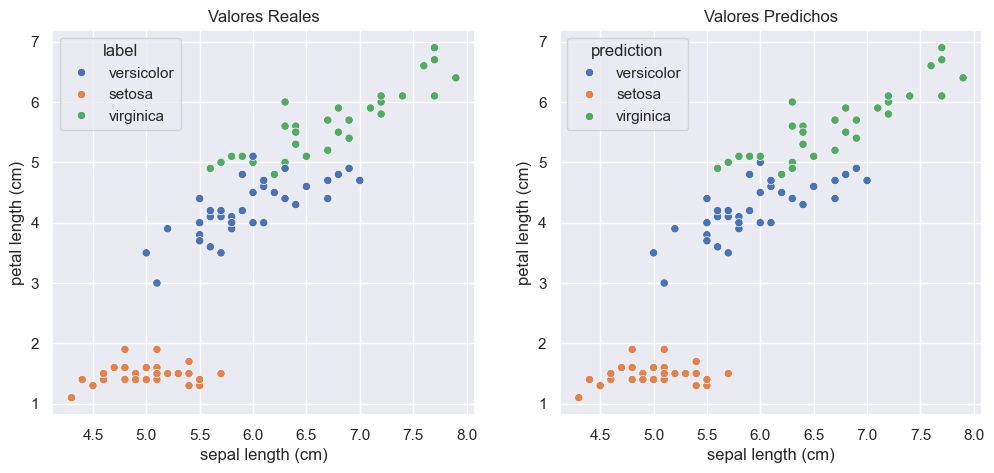

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

temp_df = X_train.copy()
temp_df["label"] = y_train
temp_df["prediction"] = y_train_pred

# Scatter plot con los valores reales
sns.scatterplot(data=temp_df, x="sepal length (cm)", y="petal length (cm)", hue="label", ax=axes[0])
axes[0].set_title('Valores Reales')

# Scatter plot con los valores predichos
sns.scatterplot(data=temp_df, x="sepal length (cm)", y="petal length (cm)", hue="prediction", ax=axes[1])
axes[1].set_title('Valores Predichos')

plt.show()

Ahora calculemos una métrica. De nuevo, scikit-learn nos ofrece una gran variedad de [métricas](https://scikit-learn.org/stable/api/sklearn.metrics.html).

En este caso, utilizaremos la [tasa de acierto](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score) como métrica, que nos indica cuántas veces el modelo predijo correctamente:

In [32]:
from sklearn.metrics import accuracy_score

En general, todas las métricas se usan de la misma manera: el primer valor que debe ir es el valor verdadero (ground truth), y el segundo es la predicción del modelo:

In [33]:
print("La tasa de acierto en el conjunto de entrenamiento es:", accuracy_score(y_train, y_train_pred))
print("La tasa de acierto en el conjunto de evaluación es:", accuracy_score(y_test, y_pred))

La tasa de acierto en el conjunto de entrenamiento es: 0.9714285714285714
La tasa de acierto en el conjunto de evaluación es: 0.9777777777777777


Vemos que en este caso, ambas métricas son muy buenas. Es decir, este modelo se ajusta bien a los datos y logra generalizar. Si hubiéramos obtenido métricas bajas en ambos conjuntos de datos, estaríamos frente a un caso de *subajuste (underfitting)*. Si la métrica de entrenamiento fuera significativamente mejor que la de evaluación, estaríamos ante un caso de *sobreajuste (overfitting)*.

En esos casos, tendríamos que revisar nuestros pasos, cambiar cómo trabajamos con los datos, qué modelo utilizamos, etc. También, para evitar llegar al último paso antes de hacer cambios, podemos utilizar métodos de validación cruzada para ayudar a seleccionar modelos o hiperparámetros, de manera que cuando lleguemos a la evaluación, ya estemos preparados para ver si el modelo generaliza correctamente.

**Nota**: Estos resultados tan buenos se deben a que estamos utilizando un dataset de juguete, diseñado específicamente para probar las herramientas. Es muy raro encontrar este nivel de rendimiento en casos reales.

### Predicción

En nuestro caso, el modelo generaliza correctamente. Por lo tanto, ya estaría listo para pasar a producción. No olvidemos que, en Machine Learning, construimos modelos para realizar predicciones.

Si cerramos la notebook ahora, perderíamos todo lo realizado. Para evitar tener que re-entrenar el modelo cada vez que queramos usarlo, podemos persistirlo. En este caso, utilizaremos [**joblib**](https://joblib.readthedocs.io/en/stable/), que es una de las múltiples formas en que podemos hacerlo:

In [34]:
import joblib

with open('modelo.pkl', 'wb') as archivo:
    joblib.dump(model, archivo)

Si lo queremos recuperar, podemos hacerlo de la siguiente manera:


In [35]:
with open('modelo.pkl', 'rb') as archivo:
    modelo_cargado = joblib.load(archivo)

Y usarlo para realizar predicciones:

In [36]:
X_pred = pd.DataFrame({"sepal length (cm)": [5.8, 4.7],
                       "sepal width (cm)": [2.9, 3.3],
                       "petal length (cm)": [4.9, 1.4],
                       "petal width (cm)": [1.8, 0.2], 
                       })

predicciones = modelo_cargado.predict(X_pred) 
predicciones

array(['virginica', 'setosa'], dtype=object)